In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('../data/interim/red_wine_quality_outliers.csv')

In [3]:
df.columns

Index(['Unnamed: 0', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [4]:
df.drop(columns='Unnamed: 0', inplace=True)

In [5]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1451 entries, 0 to 1450
Data columns (total 12 columns):
fixed acidity           1451 non-null float64
volatile acidity        1451 non-null float64
citric acid             1451 non-null float64
residual sugar          1451 non-null float64
chlorides               1451 non-null float64
free sulfur dioxide     1451 non-null float64
total sulfur dioxide    1451 non-null float64
density                 1451 non-null float64
pH                      1451 non-null float64
sulphates               1451 non-null float64
alcohol                 1451 non-null float64
quality                 1451 non-null int64
dtypes: float64(11), int64(1)
memory usage: 136.1 KB


In [7]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.297150,0.698363,0.180293,0.183549,-0.148815,-0.099928,0.659927,-0.705572,0.200371,-0.015114,0.145163
volatile acidity,-0.297150,1.000000,-0.589452,0.025977,0.072709,0.013943,0.110338,-0.004957,0.251343,-0.348126,-0.213213,-0.353443
citric acid,0.698363,-0.589452,1.000000,0.184960,0.100361,-0.074441,0.005301,0.371729,-0.520311,0.302815,0.168766,0.243999
residual sugar,0.180293,0.025977,0.184960,1.000000,0.126735,-0.000844,0.095093,0.344801,-0.075140,0.076129,0.162533,0.061482
chlorides,0.183549,0.072709,0.100361,0.126735,1.000000,-0.058163,0.045025,0.328695,-0.182841,0.022107,-0.205414,-0.108787
free sulfur dioxide,-0.148815,0.013943,-0.074441,-0.000844,-0.058163,1.000000,0.660188,-0.037630,0.108831,0.055956,-0.077993,-0.071202
total sulfur dioxide,-0.099928,0.110338,0.005301,0.095093,0.045025,0.660188,1.000000,0.118965,-0.005940,-0.039024,-0.259952,-0.237745
density,0.659927,-0.004957,0.371729,0.344801,0.328695,-0.037630,0.118965,1.000000,-0.312310,0.129896,-0.468312,-0.167568
pH,-0.705572,0.251343,-0.520311,-0.075140,-0.182841,0.108831,-0.005940,-0.312310,1.000000,-0.039082,0.135624,-0.082164
sulphates,0.200371,-0.348126,0.302815,0.076129,0.022107,0.055956,-0.039024,0.129896,-0.039082,1.000000,0.241636,0.386567


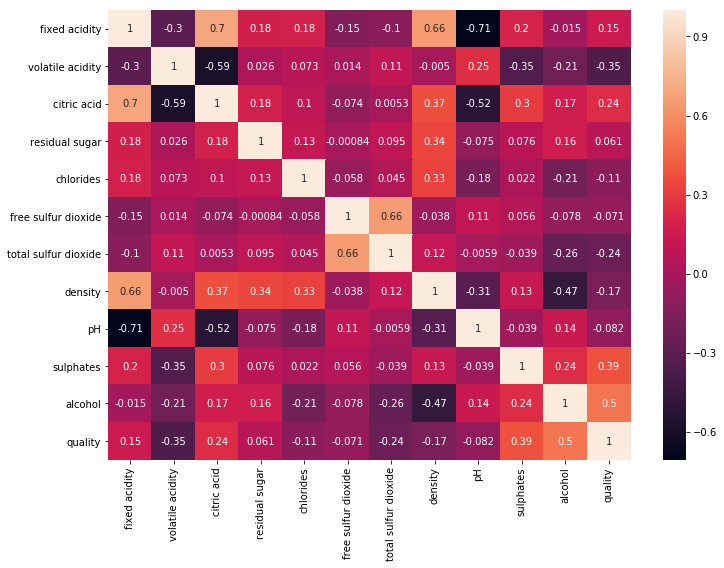

In [8]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(df.corr(), annot = True)

In [9]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [10]:
X = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'sulphates', 'alcohol', 'quality']]
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,0.56,9.4,5


In [11]:
y = df['pH']
y.head()

0    3.51
1    3.20
2    3.26
3    3.16
4    3.51
Name: pH, dtype: float64

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [43]:
from sklearn.linear_model import LinearRegression, Lasso

In [15]:
model = lm.fit(X_train, y_train)

In [16]:
print(lm.intercept_)
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coeff_df

-61.01615880751245


,Coefficient
fixed acidity,-0.094522
volatile acidity,-0.016554
citric acid,-0.073068
residual sugar,-0.028903
chlorides,-0.609955
free sulfur dioxide,0.001003
total sulfur dioxide,-0.000646
density,64.770347
sulphates,0.019107
alcohol,0.071781


In [17]:
prediccion= lm.predict(X_test)

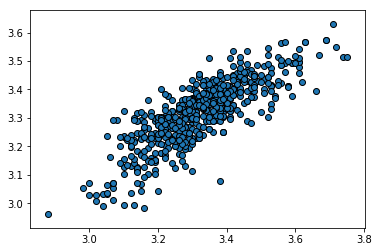

In [18]:
plt.scatter(y_test, prediccion, edgecolor='black')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


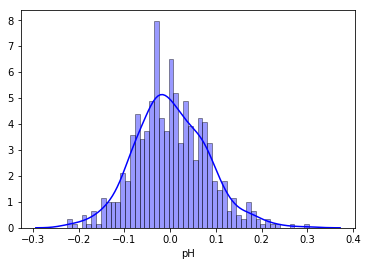

In [19]:
sns.distplot((y_test - prediccion), bins = 50, hist_kws=dict(edgecolor="black", linewidth=1),color='Blue')

In [20]:
from sklearn import metrics

In [21]:
print('MAE (Error absoluto medio):', metrics.mean_absolute_error(y_test, prediccion))
print('MSE (Error cuadrático medio):', metrics.mean_squared_error(y_test, prediccion))
print('RMSE (raiz cuadrada del Error cuadrático medio:', np.sqrt(metrics.mean_squared_error(y_test, prediccion)))

MAE (Error absoluto medio): 0.06204743063975682
MSE (Error cuadrático medio): 0.006239846290373711
RMSE (raiz cuadrada del Error cuadrático medio: 0.07899269770284915


In [22]:
r2 = lm.score(X_train, y_train)
print('r2:', r2)

r2: 0.6996986528943105


In [23]:
print ("Score:", model.score(X_test, y_test))

Score: 0.6672921807945844
